In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import hdbscan
import seaborn as sns
sns.set_style("dark")

/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
pd.set_option("display.max_rows",2000)
pd.set_option("display.max_columns",100)
pd.set_option('max_colwidth', 1000)

### Load the 2012 data:

In [3]:
data = pd.read_csv('data/college-scorecard-raw-data-030216/merged_2012_PP.csv', encoding='iso-8859-1',
                   na_values="PrivacySuppressed")


In [4]:
alldata = pd.DataFrame()
for yr in range(1996,2014):
    data = pd.read_csv('data/college-scorecard-raw-data-030216/merged_'+str(yr)+'_PP.csv', encoding='iso-8859-1',
                       na_values="PrivacySuppressed")
    data['year'] = yr
    alldata = pd.concat((alldata,data))
alldata.info()

/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jhummel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 124699 entries, 0 to 7803
Columns: 1730 entries, UNITID to year
dtypes: float64(1713), int64(7), object(10)
memory usage: 1.6+ GB


Group variables by dev-category using the Data Dictionary.

In [5]:
df_dict = pd.read_csv('data/CollegeScorecardDataDictionary-09-08-2015.csv')
df_dict.columns

Index(['NAME OF DATA ELEMENT', 'dev-category', 'developer-friendly name',
       'API data type', 'VARIABLE NAME', 'VALUE', 'LABEL', 'SOURCE', 'NOTES'],
      dtype='object')

In [6]:
df_dict.set_index('VARIABLE NAME', inplace=True)
dcat = df_dict.groupby('dev-category')
dcat.groups.keys()

dict_keys(['academics', 'root', 'aid', 'earnings', 'repayment', 'completion', 'cost', 'school', 'admissions', 'student'])

### Let's look at just the variables in the repayment category:

In [7]:
repayment_vars = dcat.groups['repayment']
repayment_dict = dcat.get_group('repayment')
len(repayment_dict)

130

In [8]:
repayment_dict[['developer-friendly name', 'NAME OF DATA ELEMENT']]

,developer-friendly name,NAME OF DATA ELEMENT
VARIABLE NAME,,
CDR2,2_yr_default_rate,Two-year cohort default rate
CDR3,3_yr_default_rate,Three-year cohort default rate
RPY_1YR_RT,repayment_cohort.1_year_declining_balance,"Fraction of repayment cohort that has not defaulted, and with loan balances that have declined one year since entering repayment, excluding enrolled and military deferment from calculation. (Rolling averages)"
COMPL_RPY_1YR_RT,1_yr_repayment.completers,One-year repayment rate for completers
NONCOM_RPY_1YR_RT,1_yr_repayment.noncompleters,One-year repayment rate for non-completers
LO_INC_RPY_1YR_RT,1_yr_repayment.income.0_30000,"One-year repayment rate by family income ($0-30,000)"
MD_INC_RPY_1YR_RT,1_yr_repayment.income.30000_75000,"One-year repayment rate by family income ($30,000-75,000)"
HI_INC_RPY_1YR_RT,1_yr_repayment.income.greater_than_75000,"One-year repayment rate by family income ($75,000+)"
DEP_RPY_1YR_RT,1_yr_repayment.dependent_students,One-year repayment rate for dependent students


The repayment data is very similar to the reduced completion data. Repayment statistics are broken out for students who have entered repayment after having either:
- completed their degree course.
- withdrawn without completing.

These statistics are provided for students who are 1, 3, 5, and 7 years out of college, and are further broken down into similar demographic categories as the completion data, sans race, plus dependent status.

### Now let's examine what data is available:

In [9]:
repayment = alldata[["UNITID", "INSTNM", "sch_deg", "year"]+repayment_vars]
repayment12 = data[["UNITID", "INSTNM", "sch_deg"]+repayment_vars]

In [10]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124699 entries, 0 to 7803
Columns: 134 entries, UNITID to NOTFIRSTGEN_RPY_3YR_RT_SUPP
dtypes: float64(130), int64(2), object(2)
memory usage: 128.4+ MB


In [11]:
repayment12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Columns: 133 entries, UNITID to NOTFIRSTGEN_RPY_3YR_RT_SUPP
dtypes: float64(131), int64(1), object(1)
memory usage: 7.9+ MB


## Repayment data histogram by school:

/home/jhummel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


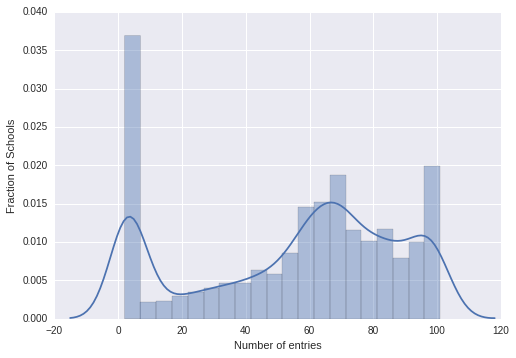

In [12]:
sns.set_style("darkgrid")
sns.distplot(repayment12.count(axis=1), bins=20, kde=True)
plt.xlabel("Number of entries")
plt.ylabel("Fraction of Schools")
plt.savefig("Repayment_Data_histogram_all.png")

#### So most scools have around half (130/2) the repayment data for 2012, but a significant number have practially none.

_Let's break out just the predominantly Bachelor's degree institutions as we did with the completion data:_

In [13]:
degreeTypeDict = {1: "Predominantly Certificate Degrees",
                  2: "Predominantly Associate's Degrees",
                  3: "Predominantly Bachelor's Degrees"}

In [14]:
degreeType = repayment.groupby("sch_deg")
bachelors = repayment[repayment.sch_deg == 3]
bachelors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37512 entries, 0 to 7792
Columns: 134 entries, UNITID to NOTFIRSTGEN_RPY_3YR_RT_SUPP
dtypes: float64(130), int64(2), object(2)
memory usage: 38.6+ MB


/home/jhummel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


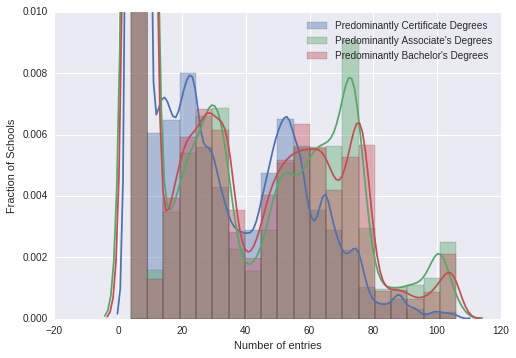

In [15]:
f, ax = plt.subplots()
for dgtype,dgdata in degreeType:
    sns.distplot(dgdata.count(axis=1), ax=ax, bins=20, label=degreeTypeDict[dgtype])
ax.set_ylim(0,.01)
ax.legend()
ax.set_xlabel("Number of entries")
ax.set_ylabel("Fraction of Schools")
f.savefig("Repayment_Data_histogram_byDegree.png", bbox_inches='tight')

###### So, not as big a difference for the 4-year institutions as with the completion data, but still more data for them, and less completely missing data.

### We'll focus on bachelor's degree-granting institutions from here on out, for consistency.

### Count all non-null values in each _column_

/home/jhummel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


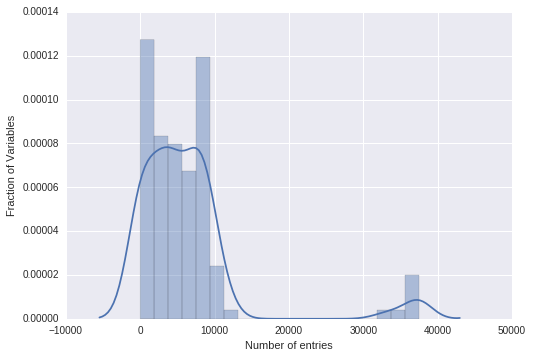

In [16]:
sns.distplot(bachelors.count(axis=0), bins=20, kde=True, rug=False)
plt.xlabel("Number of entries")
plt.ylabel("Fraction of Variables")

In [17]:
col_entry_counts = bachelors.count(axis=0)
col_entry_counts.sort_values()

PELL_RPY_7YR_RT                    0
NONCOM_RPY_7YR_RT                  0
LO_INC_RPY_7YR_RT                  0
MD_INC_RPY_7YR_RT                  0
HI_INC_RPY_7YR_RT                  0
DEP_RPY_7YR_RT                     0
IND_RPY_7YR_RT                     0
DEP_RPY_7YR_N                      0
NOPELL_RPY_7YR_RT                  0
FEMALE_RPY_7YR_RT                  0
MALE_RPY_7YR_RT                    0
FIRSTGEN_RPY_7YR_RT                0
COMPL_RPY_7YR_RT                   0
NOTFIRSTGEN_RPY_7YR_RT             0
FIRSTGEN_RPY_7YR_N                 0
MALE_RPY_7YR_N                     0
FEMALE_RPY_7YR_N                   0
NOPELL_RPY_7YR_N                   0
PELL_RPY_7YR_N                     0
RPY_7YR_N                          0
COMPL_RPY_7YR_N                    0
NONCOM_RPY_7YR_N                   0
LO_INC_RPY_7YR_N                   0
MD_INC_RPY_7YR_N                   0
HI_INC_RPY_7YR_N                   0
NOTFIRSTGEN_RPY_7YR_N              0
RPY_7YR_RT                         0
I

So, the **default** data is there (`CDR2` and `CDR3`), and the 1-yr and 7-yr data is mostly missing...

_Let's break the repayment data up by cohort:_

In [18]:
repayment_cohort = {1:None, 3:None, 5:None, 7:None}
for year in repayment_cohort.keys():
    repayment_cohort[year] = bachelors.loc[:,bachelors.columns.str.contains(str(year)+"YR")]
    repayment_cohort[year].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37512 entries, 0 to 7792
Data columns (total 28 columns):
RPY_1YR_RT                10839 non-null float64
COMPL_RPY_1YR_RT          2342 non-null float64
NONCOM_RPY_1YR_RT         5085 non-null float64
LO_INC_RPY_1YR_RT         8076 non-null float64
MD_INC_RPY_1YR_RT         7896 non-null float64
HI_INC_RPY_1YR_RT         3363 non-null float64
DEP_RPY_1YR_RT            5793 non-null float64
IND_RPY_1YR_RT            3977 non-null float64
PELL_RPY_1YR_RT           6182 non-null float64
NOPELL_RPY_1YR_RT         3821 non-null float64
FEMALE_RPY_1YR_RT         7298 non-null float64
MALE_RPY_1YR_RT           5101 non-null float64
FIRSTGEN_RPY_1YR_RT       8112 non-null float64
NOTFIRSTGEN_RPY_1YR_RT    9526 non-null float64
RPY_1YR_N                 11526 non-null float64
COMPL_RPY_1YR_N           6398 non-null float64
NONCOM_RPY_1YR_N          8075 non-null float64
LO_INC_RPY_1YR_N          9228 non-null float64
MD_INC_RPY_1YR_N          

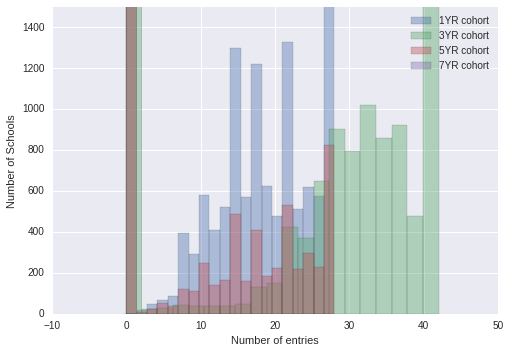

In [19]:
f, ax = plt.subplots()
for year in repayment_cohort.keys():
    sns.distplot(repayment_cohort[year].count(axis=1), ax=ax, bins=20, kde=None, label=str(year)+"YR cohort")
ax.set_ylim(0,1500)
ax.legend(loc=0)
ax.set_xlabel("Number of entries")
ax.set_ylabel("Number of Schools")
f.savefig("Repayment_Data_histogram_byYear.png", bbox_inches='tight')

## The 3YR repayment data is FAR more available than the others!

So, let's drop the other years:

In [20]:
drop_vars = []
for i in (1,5,7):
    drop_vars += repayment_dict[repayment_dict.index.str.contains(str(i)+"YR")].index.tolist()
    

bachelors3yr = bachelors.drop(drop_vars, axis=1)
len(bachelors3yr.columns)

50

In [21]:
df_dict.loc[bachelors3yr.columns][['developer-friendly name', 'NAME OF DATA ELEMENT']]

,developer-friendly name,NAME OF DATA ELEMENT
VARIABLE NAME,,
UNITID,id,Unit ID for institution
INSTNM,name,Institution name
sch_deg,degrees_awarded.predominant_recoded,Predominant degree awarded (recoded 0s and 4s)
year,NaN,NaN
CDR2,2_yr_default_rate,Two-year cohort default rate
CDR3,3_yr_default_rate,Three-year cohort default rate
RPY_3YR_RT,repayment_cohort.3_year_declining_balance,"Fraction of repayment cohort that has not defaulted, and with loan balances that have declined three years since entering repayment, excluding enrolled and military deferment from calculation. (rolling averages)"
COMPL_RPY_3YR_RT,3_yr_repayment.completers,Three-year repayment rate for completers
NONCOM_RPY_3YR_RT,3_yr_repayment.noncompleters,Three-year repayment rate for non-completers


### Let's pick out just the repayment rates:

In [22]:
bachelors3yr.loc[:,bachelors3yr.columns.str.contains("_3YR_RT")].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37512 entries, 0 to 7792
Data columns (total 28 columns):
RPY_3YR_RT                     8615 non-null float64
COMPL_RPY_3YR_RT               2132 non-null float64
NONCOM_RPY_3YR_RT              4268 non-null float64
LO_INC_RPY_3YR_RT              6543 non-null float64
MD_INC_RPY_3YR_RT              6413 non-null float64
HI_INC_RPY_3YR_RT              2817 non-null float64
DEP_RPY_3YR_RT                 4886 non-null float64
IND_RPY_3YR_RT                 3260 non-null float64
PELL_RPY_3YR_RT                5015 non-null float64
NOPELL_RPY_3YR_RT              3264 non-null float64
FEMALE_RPY_3YR_RT              5881 non-null float64
MALE_RPY_3YR_RT                4236 non-null float64
FIRSTGEN_RPY_3YR_RT            6549 non-null float64
NOTFIRSTGEN_RPY_3YR_RT         7656 non-null float64
RPY_3YR_RT_SUPP                8960 non-null float64
LO_INC_RPY_3YR_RT_SUPP         8727 non-null float64
MD_INC_RPY_3YR_RT_SUPP         8670 non-null

From the Scorecard data documentation: 

"The repayment rates are produced in
rolling two-year
averages to reduce variability from year to
year; and the three-year repayment rate, which will be included
on our consumer tool, is suppressed for schools with fewer than
30 borrowers in the two cohorts to produce more stable
measures (RPY_3YR_RT_SUPP). "

The suppressed rates are stabilized year-over-year, hence why there are more entries for those variables.  Let's use them...

In [23]:
bachelors3yr.loc[:,bachelors3yr.columns.str.contains("_3YR_RT_SUPP")].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37512 entries, 0 to 7792
Data columns (total 14 columns):
RPY_3YR_RT_SUPP                8960 non-null float64
LO_INC_RPY_3YR_RT_SUPP         8727 non-null float64
MD_INC_RPY_3YR_RT_SUPP         8670 non-null float64
HI_INC_RPY_3YR_RT_SUPP         8093 non-null float64
COMPL_RPY_3YR_RT_SUPP          8435 non-null float64
NONCOM_RPY_3YR_RT_SUPP         8749 non-null float64
DEP_RPY_3YR_RT_SUPP            8653 non-null float64
IND_RPY_3YR_RT_SUPP            7952 non-null float64
PELL_RPY_3YR_RT_SUPP           8759 non-null float64
NOPELL_RPY_3YR_RT_SUPP         8744 non-null float64
FEMALE_RPY_3YR_RT_SUPP         8792 non-null float64
MALE_RPY_3YR_RT_SUPP           8537 non-null float64
FIRSTGEN_RPY_3YR_RT_SUPP       8522 non-null float64
NOTFIRSTGEN_RPY_3YR_RT_SUPP    8844 non-null float64
dtypes: float64(14)
memory usage: 4.3 MB


# In summary, I suggest the following:
1. A great deal of the missing data is coming from predominantly certificate-granting institutions.  I again suggest we restrict our analysis to primarily Bachelor's degree-granting institutions.

2. The repayment data consists of over 100 variables.  Most of this, however, is the same demographic categories for each of the 1, 3, 5, and 7 year repayment cohorts.  

   As it turns out, most of the 1YR and 7YR data is non-existent, and there is significantly more 3YR than 5YR data (see histograms above).  
   
I think it worthwhile to keep the demographic breakdowns for the repayment data, which leaves us with the following 14 columns:
 - `RPY_3YR_RT_SUPP`
 - `LO_INC_RPY_3YR_RT_SUPP`
 - `MD_INC_RPY_3YR_RT_SUPP`
 - `HI_INC_RPY_3YR_RT_SUPP`
 - `COMPL_RPY_3YR_RT_SUPP`
 - `NONCOM_RPY_3YR_RT_SUPP`
 - `DEP_RPY_3YR_RT_SUPP`
 - `IND_RPY_3YR_RT_SUPP`
 - `PELL_RPY_3YR_RT_SUPP`
 - `NOPELL_RPY_3YR_RT_SUPP`
 - `FEMALE_RPY_3YR_RT_SUPP`
 - `MALE_RPY_3YR_RT_SUPP`
 - `FIRSTGEN_RPY_3YR_RT_SUPP`
 - `NOTFIRSTGEN_RPY_3YR_RT_SUPP`